#Eniac's A/B Testing

###Imports

In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import re
from scipy.stats import chi2_contingency
from statsmodels.stats.proportion import proportions_ztest
from statsmodels.stats.multitest import multipletests
from itertools import combinations

###Load datasets

In [61]:
# eniac_a.csv
url = "https://drive.google.com/file/d/1VhlT7u-Jv7cGajrYGBayYrbfzKpx_WPq/view?usp=sharing"
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
eniac_a = pd.read_csv(path)

# eniac_b.csv
url = "https://drive.google.com/file/d/1rSM8Qim2RhZp5KAQy51YY-ZCDl_jt_AJ/view?usp=sharing"
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
eniac_b = pd.read_csv(path)

# eniac_c.csv
url = "https://drive.google.com/file/d/1-950Mes5gKqJyGkPpxMoE6XZDKiSQL1F/view?usp=sharing"
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
eniac_c = pd.read_csv(path)

# eniac_d.csv
url = "https://drive.google.com/file/d/1RlV_BtaiReOzDKLseY6SesFUHvCwfWbs/view?usp=sharing"
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
eniac_d = pd.read_csv(path)

###Preview the data

In [8]:
eniac_a_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57 entries, 0 to 56
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Element ID            57 non-null     int64 
 1   Tag name              57 non-null     object
 2   Name                  57 non-null     object
 3   No. clicks            57 non-null     int64 
 4   Visible?              57 non-null     bool  
 5   Snapshot information  2 non-null      object
dtypes: bool(1), int64(2), object(3)
memory usage: 2.4+ KB


In [68]:
eniac_a_df

,Element ID,Tag name,Name,No. clicks,Visible?,Snapshot information
0,48,h1,ENIAC,269,True,Homepage Version A - white SHOP NOW • http...
1,25,div,mySidebar,309,True,created 2021-09-14 • 14 days 0 hours 34 mi...
2,4,a,Mac,279,True,NaN
3,69,a,iPhone,246,True,NaN
4,105,a,Accessories,1235,True,NaN
5,36,a,Chargers & Cables,1261,False,NaN
6,99,a,iPhone Accessories,1226,False,NaN
7,68,a,Watch Accessories,1261,False,NaN
8,13,a,Mac Accessories,1308,False,NaN
9,15,a,AirTag,206,False,NaN


In [69]:
eniac_b_df

,Element ID,Tag name,Name,No. clicks,Visible?,Snapshot information
0,48,h1,ENIAC,236,True,Homepage Version B - red SHOP NOW • https:...
1,25,div,mySidebar,304,True,created 2021-10-27 • 14 days 0 hours 34 mi...
2,4,a,Mac,268,True,NaN
3,69,a,iPhone,260,True,NaN
4,105,a,Accessories,1214,True,NaN
5,36,a,Chargers & Cables,1259,False,NaN
6,99,a,iPhone Accessories,1237,False,NaN
7,68,a,Watch Accessories,1221,False,NaN
8,13,a,Mac Accessories,1210,False,NaN
9,15,a,AirTag,195,False,NaN


In [70]:
eniac_c_df

,Element ID,Tag name,Name,No. clicks,Visible?,Snapshot information
0,48,h1,ENIAC,288,True,Homepage Version C - white SEE DEALS • htt...
1,25,div,mySidebar,283,True,created 2021-10-27 • 14 days 0 hours 34 mi...
2,4,a,Mac,262,True,NaN
3,69,a,iPhone,234,True,NaN
4,105,a,Accessories,1288,True,NaN
5,36,a,Chargers & Cables,1224,False,NaN
6,99,a,iPhone Accessories,1175,False,NaN
7,68,a,Watch Accessories,1264,False,NaN
8,13,a,Mac Accessories,1203,False,NaN
9,15,a,AirTag,202,False,NaN


In [71]:
eniac_d_df

,Element ID,Tag name,Name,No. clicks,Visible?,Snapshot information
0,48,h1,ENIAC,285,True,Homepage Version D - red SEE DEALS • https...
1,25,div,mySidebar,305,True,created 2021-10-27 • 14 days 0 hours 34 mi...
2,4,a,Mac,274,True,NaN
3,69,a,iPhone,243,True,NaN
4,105,a,Accessories,1267,True,NaN
5,36,a,Chargers & Cables,1260,False,NaN
6,99,a,iPhone Accessories,1296,False,NaN
7,68,a,Watch Accessories,1252,False,NaN
8,13,a,Mac Accessories,1273,False,NaN
9,15,a,AirTag,201,False,NaN


From the structure of your table, it looks like this is a click log showing which elements users interacted with — not a summary with CTRs yet.

The button click is logged as a row where "Name" is "SHOP NOW" or "SEE DEALS"

###Get total clicks per version

The button click is logged as a row where "Name" is "SHOP NOW" or "SEE DEALS"


1. Since the CTA button click count is in the No. clicks column for the row where the Name is either "SEE DEALS" or "SHOP NOW", we can extract clicks directly by filtering the Name column.

2. Number of visits is written in row 1 of the Snapshot information column. For instance, for eniac_a.df is "created 2021-09-14 • 14 days 0 hours 34 mins • 25326 visits, 23174 clicks".

3. Build a contingency table

#### Function to extract number of clicks from the row where Name == CTA label

In [97]:
def extract_clicks(df):
    row = df[df["Name"].isin(["SHOP NOW", "SEE DEALS"])]
    if not row.empty:
        return int(row["No. clicks"].max())  # Use .max() in case of duplicates
    else:
        return 0  # Fallback if no match found


#### Function to extract number of visits from snapshot info row

In [98]:
# Visits per version
def extract_visits(snapshot_str):
    match = re.search(r"(\d+)\s+visits", snapshot_str)
    return int(match.group(1)) if match else None

#### CTA button variants and DataFrames

In [99]:
versions = {
    "White SHOP NOW": (eniac_a_df, "Homepage Version A - white SHOP NOW"),
    "Red SHOP NOW": (eniac_b_df, "Homepage Version B - red SHOP NOW"),
    "White SEE DEALS": (eniac_c_df, "Homepage Version C - white SEE DEALS"),
    "Red SEE DEALS": (eniac_d_df, "Homepage Version D - red SEE DEALS")
}

In [100]:
# Extract total clicks for each version (assuming CTA is only one element containing "SHOP NOW"/"SEE DEALS")
# List to store click and view data for each variant
results = []

#### Loop through each version to extract click + view info


In [101]:
for label, (df, identifier) in versions.items():
    # Step 1: Get number of visits from snapshot row (row 1)
    snapshot_info = df.loc[1, "Snapshot information"]
    visits = extract_visits(snapshot_info)

    if visits is None:
        print(f"⚠️ Couldn't extract visits for {label}")
        continue

    # Step 2: Extract clicks from 'Name' column
    clicks = extract_clicks(df)

    results.append({
        "variant": label,
        "clicks": clicks,
        "views": visits,
        "non_clicks": visits - clicks
    })

#### Convert the list of results into a DataFrame for analysis


In [128]:
summary_df = pd.DataFrame(results)
print("✅ Summary Table:")
print(summary_df)

✅ Summary Table:
           variant  clicks  views  non_clicks
0   White SHOP NOW     512  25326       24814
1     Red SHOP NOW     281  24747       24466
2  White SEE DEALS     527  24876       24349
3    Red SEE DEALS     193  25233       25040


##Chi-squared test

###State the Null Hypothesis and the Alternative Hypothesis.

Null Hypothesis ( 𝐻0 ): The click rate on each website (A, B, C and D) is equal.

Alternative Hypothesis ( 𝐻𝐴 ): At least one of the websites has a significantly different click rate compared to the others, either better or worse.

###Select an appropriate significance level alpha ( 𝛼 ).

Commonly used levels are 0.1, 0.05 and 0.01.

In our case, as we don't expect the color of a button to have a profound impact on the course of history, a comfortable alpha level of 0.1 would be suitable.

In [140]:
alpha = 0.05

###Collect Data that is random and independent


We will assume that this experiment was carefully designed, ensuring that the data collected is random and independent, which is crucial for reliable statistical analysis.

####Prepare a contingency table

In [130]:
# Create 2x4 contingency table: rows = [clicks, non_clicks]; columns = variants
contingency = summary_df[["clicks", "non_clicks"]].T.to_numpy()
contingency

array([[  512,   281,   527,   193],
       [24814, 24466, 24349, 25040]])

In [131]:
Click = [ 512,   281,   527,   193]
No_click = [24814, 24466, 24349, 25040]

observed_results = pd.DataFrame(
    [Click, No_click], columns=["A", "B", "C", "D"], index=["Click", "No-click"]
)
observed_results

,A,B,C,D
Click,512,281,527,193
No-click,24814,24466,24349,25040


###Run Chi-squared test

In [132]:
chisq, pvalue, df, expected = chi2_contingency(observed_results)

In [133]:
chisq

np.float64(224.01877488058412)

In [134]:
pvalue

np.float64(2.7161216607868712e-48)

In [135]:
df

3

In [136]:
expected

array([[  382.48625502,   373.74189974,   375.69012397,   381.08172127],
       [24943.51374498, 24373.25810026, 24500.30987603, 24851.91827873]])

###Interpret the test result

In [137]:
if pvalue > alpha:
    print("The p-value is larger than alpha.")
else:
    print("The p-value is smaller than alpha.")

The p-value is smaller than alpha.


Since the p-value is smaller than alpha, we reject the Null Hypothesis and one the versions is different

##Run post-hoc Bonferroni test

In [146]:
# Post hoc z-tests between all variant pairs
pairs = list(combinations(summary_df.index, 2))
p_vals = []
labels = []

for i, j in pairs:
        count = [summary_df.loc[i, "clicks"], summary_df.loc[j, "clicks"]]
        nobs = [summary_df.loc[i, "views"], summary_df.loc[j, "views"]]
        stat, p = proportions_ztest(count, nobs)
        p_vals.append(p)
        labels.append(f"{summary_df.loc[i, 'variant']} vs {summary_df.loc[j, 'variant']}")

In [149]:
# Multiple test correction
reject, pvals_corr, _, _ = multipletests(p_vals, method="bonferroni")

for lbl, raw_p, adj_p, sig in zip(labels, p_vals, pvals_corr, reject):
        print(f"{lbl:35} | raw p: {raw_p:.4f}, adj p: {adj_p:.4f}, significant: {sig}")

White SHOP NOW vs Red SHOP NOW      | raw p: 0.0000, adj p: 0.0000, significant: True
White SHOP NOW vs White SEE DEALS   | raw p: 0.4459, adj p: 1.0000, significant: False
White SHOP NOW vs Red SEE DEALS     | raw p: 0.0000, adj p: 0.0000, significant: True
Red SHOP NOW vs White SEE DEALS     | raw p: 0.0000, adj p: 0.0000, significant: True
Red SHOP NOW vs Red SEE DEALS       | raw p: 0.0000, adj p: 0.0001, significant: True
White SEE DEALS vs Red SEE DEALS    | raw p: 0.0000, adj p: 0.0000, significant: True


##Plot Click-Through Rates (CTRs)
This helps visually compare how each version performed.

In [153]:
summary_df["CTR"] = summary_df["clicks"] / summary_df["views"]

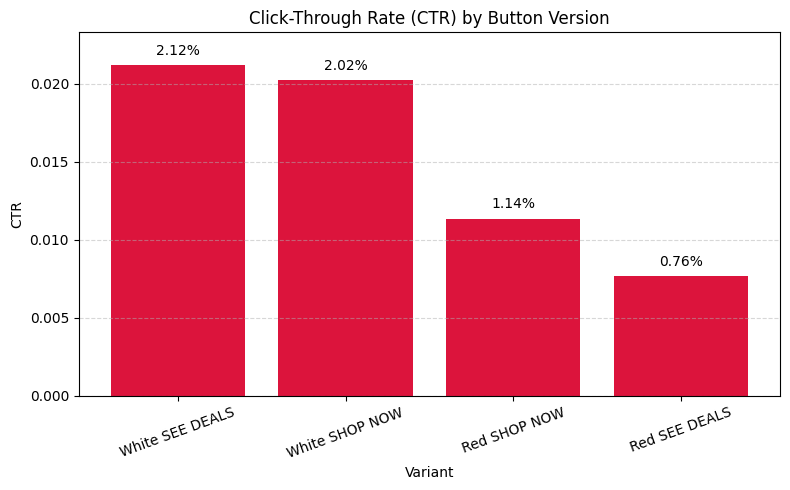

In [155]:
# Sort variants by CTR (optional for a nicer plot)
summary_sorted = summary_df.sort_values(by="CTR", ascending=False)

# Plot setup
plt.figure(figsize=(8, 5))
bars = plt.bar(summary_sorted["variant"], summary_sorted["CTR"], color="crimson")

# Titles and labels
plt.title("Click-Through Rate (CTR) by Button Version")
plt.ylabel("CTR (%)")
plt.xlabel("Variant")
plt.ylim(0, summary_sorted["CTR"].max() * 1.1)
plt.xticks(rotation=20)
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Add exact % labels above each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.0005,
             f"{height:.2%}", ha="center", va="bottom", fontsize=10)

plt.tight_layout()
plt.show()


Version A (white SEE DEALS) and Version C (white SHOP NOW) are tied as best version.\
Next: Analyze guard metrics.

##Analyze Drop-off and Homepage-Return Rates
These aren’t in the Name == "SEE DEALS" / "SHOP NOW" rows. You'll need to:

Load the linked-page data (drop-off)

Identify where homepage returns are logged

Calculate rates using similar logic to CTR (e.g., rate = bad outcome / total relevant visitors)\
Example:
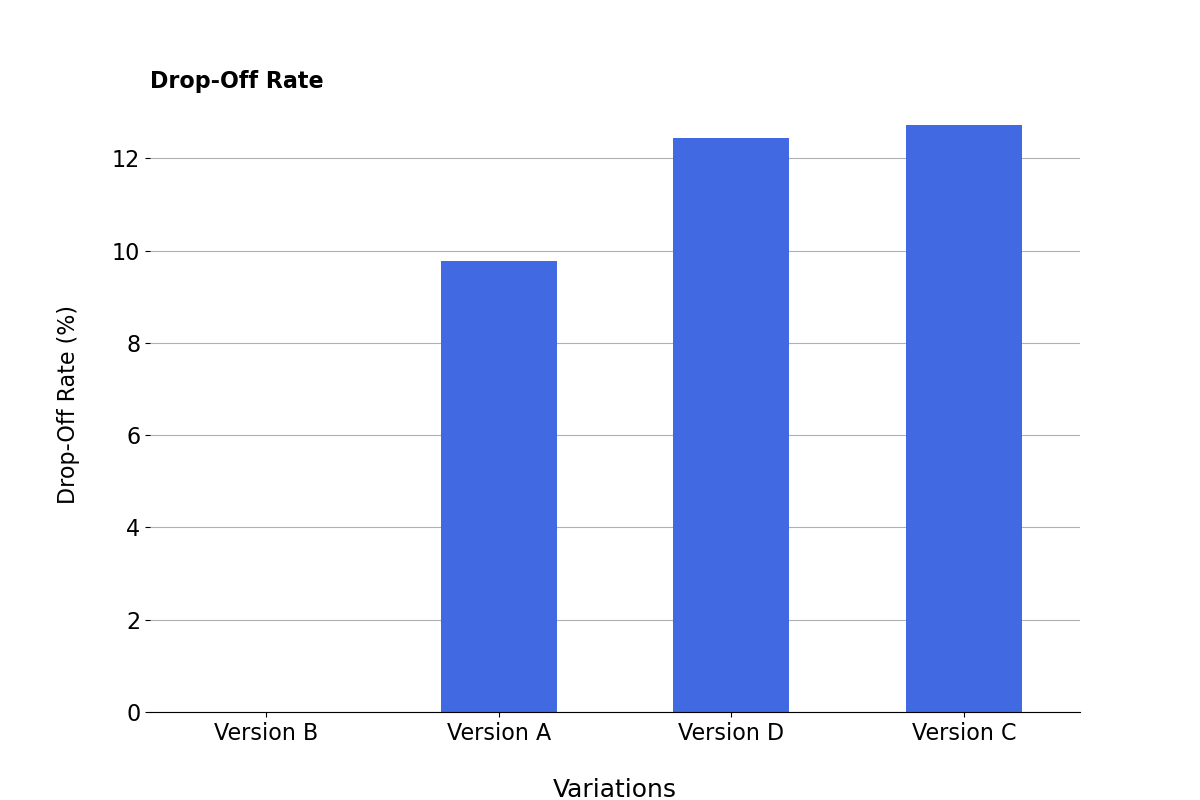

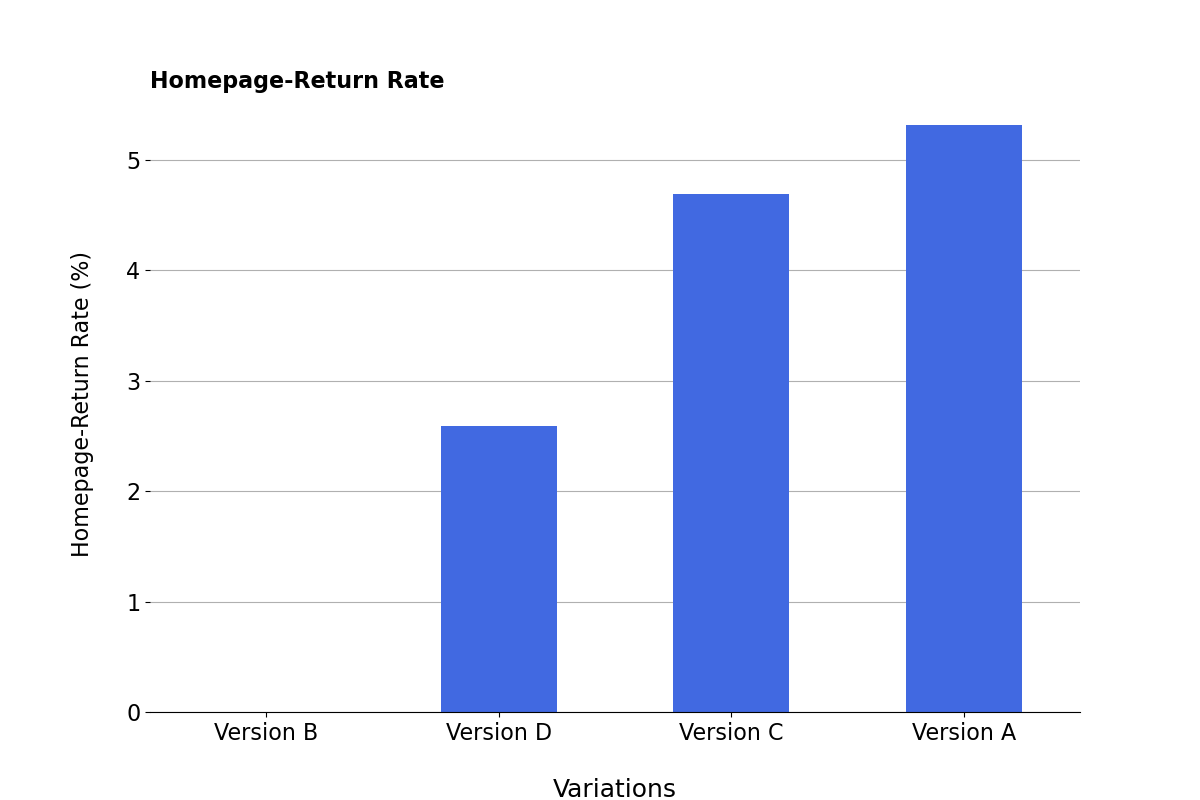

In [1]:
#homepage return rate
hpr_a =0.051
hpr_b =0
hpr_c =0.048
hpr_d =0.26
#drop off rate:
dor_a =.09
dor_b =0
dor_c =.13
dor_d =.125
# CTR values (higher is better)
ctrs = {
    'A': 2.02,
    'B': 1.14,
    'C': 2.12,
    'D': 0.76
}
# Drop-Off Rates (lower is better)
dors = {
    'A': 0.09,
    'B': 0.00,
    'C': 0.13,
    'D': 0.125
}
# Homepage Return Rates (lower is better)
hprs = {
    'A': 0.051,
    'B': 0.00,
    'C': 0.048,
    'D': 0.26
}
# Normalize function
def normalize(metric_dict, reverse=False):
    values = list(metric_dict.values())
    min_val = min(values)
    max_val = max(values)
    if max_val == min_val:
        return {k: 0.5 for k in metric_dict}  # handle division by zero
    return {
        k: (1 - (v - min_val) / (max_val - min_val)) if reverse else ((v - min_val) / (max_val - min_val))
        for k, v in metric_dict.items()
    }
# Normalize each metric
norm_ctr = normalize(ctrs)          # higher is better
norm_dor = normalize(dors, True)    # lower is better
norm_hpr = normalize(hprs, True)    # lower is better
# Weight for each metric (adjust as needed)
weights = {
    'ctr': 0.5,
    'dor': 0.25,
    'hpr': 0.25
}
# Compute final score
scores = {}
for version in ctrs.keys():
    scores[version] = (
        norm_ctr[version] * weights['ctr'] +
        norm_dor[version] * weights['dor'] +
        norm_hpr[version] * weights['hpr']
    )
# Rank versions
ranked_versions = sorted(scores.items(), key=lambda x: x[1], reverse=True)
# Output
print("Overall Ranking:")
for i, (version, score) in enumerate(ranked_versions, 1):
    print(f"{i}. Version_{version} - Score: {score:.4f}")

Overall Ranking:
1. Version_A - Score: 0.7411
2. Version_C - Score: 0.7038
3. Version_B - Score: 0.6397
4. Version_D - Score: 0.0096


# Conclusion

Version A, the original, combined with A/B Testing results with Chi-squared with post-hoc and analysis of drop-off rate and homepage-return rate should be kept.\
Indirectly, the version with red color were not favorite.